# Mini Project: Penn Dot Bicycle Crashes
## Name: Melanie Duong


## 1. Data Cleaning

In [147]:
# Import pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [148]:
# Set dataframe

df = []
selected_columns = ['MUNICIPALITY', 'FATAL_COUNT', 'INJURY_COUNT', 'BICYCLE_COUNT', 'AUTOMOBILE_COUNT', 'BUS_COUNT', 'COMM_VEH_COUNT',
 'HEAVY_TRUCK_COUNT', 'MOTORCYCLE_COUNT', 'PED_COUNT', 'SMALL_TRUCK_COUNT', 'VAN_COUNT'
]

In [149]:
# Load CRASH files

for year in range (2014, 2024):
    file_name = f"CRASH_{year}.csv"
    file_path = f"C:/Users/maidn/OneDrive - Dickinson College/Dickinson/senior/DATA 400/mini project data/Statewide_{year}/" + file_name
    crash_files = pd.read_csv(file_path, usecols = selected_columns)
    crash_files['Year'] = year
    df.append(crash_files)
    
df = pd.concat(df)

# Load municipality list

municipality_name = pd.read_csv("C:/Users/maidn/OneDrive - Dickinson College/Dickinson/senior/DATA 400/municipalities_list.csv")

In [150]:
# Check for municipality name types

municipality_name.dtypes

MUNICIPALITY          int64
MUNICIPALITY_NAME    object
dtype: object

In [151]:
# Merge crash data and municipality data

df = pd.merge(df, municipality_name, how = 'left', on = 'MUNICIPALITY')
print(df)

         AUTOMOBILE_COUNT  BICYCLE_COUNT  BUS_COUNT  COMM_VEH_COUNT  \
0                       0              0          0               0   
1                       2              0          0               0   
2                       1              0          0               0   
3                       1              0          0               0   
4                       0              0          0               0   
...                   ...            ...        ...             ...   
1210636                 0              1          0               0   
1210637                 0              0          0               0   
1210638                 1              0          0               0   
1210639                 0              0          0               0   
1210640                 2              0          0               0   

         FATAL_COUNT  HEAVY_TRUCK_COUNT  INJURY_COUNT  MOTORCYCLE_COUNT  \
0                  0                  0             1                 0 

In [152]:
# View dataframe

df.head(10)

,AUTOMOBILE_COUNT,BICYCLE_COUNT,BUS_COUNT,COMM_VEH_COUNT,FATAL_COUNT,HEAVY_TRUCK_COUNT,INJURY_COUNT,MOTORCYCLE_COUNT,MUNICIPALITY,PED_COUNT,SMALL_TRUCK_COUNT,VAN_COUNT,Year,MUNICIPALITY_NAME
0,0,0,0,0,0,0,1,0,46109,0,1,0,2014,Upper Dublin Twp
1,2,0,0,0,0,0,1,0,39301,0,0,0,2014,Allentown City
2,1,0,0,0,0,0,0,0,11222,0,1,0,2014,Richland Twp
3,1,0,0,0,0,0,0,0,2212,0,0,0,2014,Marshall Twp
4,0,0,0,0,0,0,1,0,8201,0,1,0,2014,Albany Twp
5,1,0,0,0,0,0,1,0,9219,0,0,0,2014,Plumstead Twp
6,1,0,0,0,0,0,0,0,2213,0,0,1,2014,Moon Twp
7,0,0,0,0,0,0,1,0,40228,0,1,0,2014,Salem Twp
8,2,0,0,0,0,0,1,0,39301,0,0,0,2014,Allentown City
9,2,0,0,0,0,0,0,0,4203,0,0,0,2014,Chippewa Twp


In [153]:
#View dataframe

df.shape, df.columns, df.dtypes

((1210641, 14),
 Index(['AUTOMOBILE_COUNT', 'BICYCLE_COUNT', 'BUS_COUNT', 'COMM_VEH_COUNT',
        'FATAL_COUNT', 'HEAVY_TRUCK_COUNT', 'INJURY_COUNT', 'MOTORCYCLE_COUNT',
        'MUNICIPALITY', 'PED_COUNT', 'SMALL_TRUCK_COUNT', 'VAN_COUNT', 'Year',
        'MUNICIPALITY_NAME'],
       dtype='object'),
 AUTOMOBILE_COUNT      int64
 BICYCLE_COUNT         int64
 BUS_COUNT             int64
 COMM_VEH_COUNT        int64
 FATAL_COUNT           int64
 HEAVY_TRUCK_COUNT     int64
 INJURY_COUNT          int64
 MOTORCYCLE_COUNT      int64
 MUNICIPALITY          int64
 PED_COUNT             int64
 SMALL_TRUCK_COUNT     int64
 VAN_COUNT             int64
 Year                  int64
 MUNICIPALITY_NAME    object
 dtype: object)

In [154]:
#Group data by municipal ID

df = df.groupby('MUNICIPALITY').agg({
    'Year': 'first', # Take the first value of the 'Year' column
    'MUNICIPALITY_NAME' : 'first',
    'FATAL_COUNT': 'sum',
    'INJURY_COUNT': 'sum',
    'AUTOMOBILE_COUNT': 'sum',
    'BICYCLE_COUNT': 'sum',
    'BUS_COUNT': 'sum',
    'COMM_VEH_COUNT': 'sum',
    'HEAVY_TRUCK_COUNT': 'sum',
    'MOTORCYCLE_COUNT': 'sum',
    'PED_COUNT': 'sum',
    'SMALL_TRUCK_COUNT': 'sum',
    'VAN_COUNT': 'sum'
})

In [155]:
#Reset index

df.reset_index(inplace = True)

In [156]:
#Create new variable

df['total_killed_injured'] = df['FATAL_COUNT'] + df['INJURY_COUNT']

In [157]:
df_copy = df.copy()

In [158]:
#Drop unnecessary columns

df = df.drop(columns = ['AUTOMOBILE_COUNT', 'BICYCLE_COUNT', 'BUS_COUNT', 'COMM_VEH_COUNT', 'HEAVY_TRUCK_COUNT', 'MOTORCYCLE_COUNT', 'PED_COUNT', 'SMALL_TRUCK_COUNT', 'VAN_COUNT', 'Year'])

In [159]:
#Reset index

df.reset_index()

,index,MUNICIPALITY,MUNICIPALITY_NAME,FATAL_COUNT,INJURY_COUNT,total_killed_injured
0,0,1201,Berwick Twp,4,201,205
1,1,1202,Butler Twp,3,214,217
2,2,1203,Conewago Twp,6,236,242
3,3,1204,Cumberland Twp,6,308,314
4,4,1205,Franklin Twp,12,383,395
...,...,...,...,...,...,...
2554,2554,66433,Wrightsville Boro,1,52,53
2555,2555,66434,Yoe Boro,1,23,24
2556,2556,66435,Yorkana Boro,0,6,6
2557,2557,66436,York Haven Boro,0,9,9


In [161]:
#Rearrange the order of columns

df = df[['MUNICIPALITY', 'MUNICIPALITY_NAME', 'total_killed_injured', 'INJURY_COUNT', 'FATAL_COUNT']]

#Sort values in descending order

df = df.sort_values('total_killed_injured', ascending = False)

In [162]:
#Rename columns

renamed_columns = {'MUNICIPALITY':'Penn Dot municipal ID number', 'MUNICIPALITY_NAME': 'Municipality Name', 'total_killed_injured':'Total number of people killed or injuried in crashes from 2014 to 2024', 'INJURY_COUNT':'Total people injuried in crashes from 2014 to 2024', 'FATAL_COUNT':'Total people killed in crashes from 2014 to 2024'}
df = df.rename(columns = renamed_columns)

#Reset index and rename index column

df_crash = df.reset_index(drop = True)
df_crash.index = range(1, len(df_crash) + 1)
df_crash = df_crash.rename_axis('Index')

In [163]:
#View dataframe

df_crash.shape, df_crash.columns, df_crash.dtypes

((2559, 5),
 Index(['Penn Dot municipal ID number', 'Municipality Name',
        'Total number of people killed or injuried in crashes from 2014 to 2024',
        'Total people injuried in crashes from 2014 to 2024',
        'Total people killed in crashes from 2014 to 2024'],
       dtype='object'),
 Penn Dot municipal ID number                                               int64
 Municipality Name                                                         object
 Total number of people killed or injuried in crashes from 2014 to 2024     int64
 Total people injuried in crashes from 2014 to 2024                         int64
 Total people killed in crashes from 2014 to 2024                           int64
 dtype: object)

In [164]:
#Print table

df_crash.head(10)

,Penn Dot municipal ID number,Municipality Name,Total number of people killed or injuried in crashes from 2014 to 2024,Total people injuried in crashes from 2014 to 2024,Total people killed in crashes from 2014 to 2024
Index,,,,,
1,67301,Philadelphia City,103713,102556,1157
2,2301,Pittsburgh City,21800,21604,196
3,39301,Allentown City,10556,10496,60
4,25302,Erie City,7610,7545,65
5,35302,Scranton City,6781,6730,51
6,46104,Lower Merion Twp,5896,5870,26
7,6301,Reading City,5772,5729,43
8,9202,Bensalem Twp,5752,5680,72
9,36101,Manheim Twp,4604,4574,30


In [20]:
#Export data to CSV file

df_crash.to_csv('C:/Document/Projects/CCLA ASM/PennDot_Bicycle_Crashes.csv')

## 2. Data Visualization

### a. Top 10 Municipalities with Highest Cyclists Fatalities and Serious Injury in Pennsylvania from 2014 to 2024

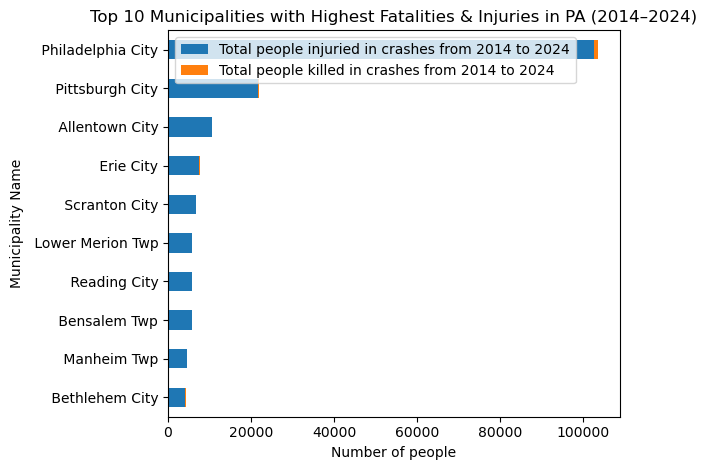

In [172]:
# Get top 10 municipalities
top10_crashes = df_crash.head(10)

# Plot
bar_graph = top10_crashes.plot(
    x='Municipality Name',
    y=[
        'Total people injuried in crashes from 2014 to 2024',
        'Total people killed in crashes from 2014 to 2024'
    ],
    kind='barh',
    stacked=True
)

# Style THIS axis
bar_graph.legend(loc='upper left')
bar_graph.set_xlabel('Number of people')
bar_graph.set_ylabel('Municipality Name')
bar_graph.set_title('Top 10 Municipalities with Highest Fatalities & Injuries in PA (2014–2024)')

# (optional) show the largest at the top and fix layout
bar_graph.invert_yaxis()
plt.tight_layout()
plt.show()

### b, Number of Cyclists Killed and Severely Injured in Crashes with Automobiles from 2014 to 2024

   Year  INJURY_COUNT
0  2014         79925
1  2015         82292
2  2016         83109
3  2017         80869
4  2018         78303
5  2019         76366
6  2020         61361
7  2021         69784
8  2022         67146
9  2023         66774


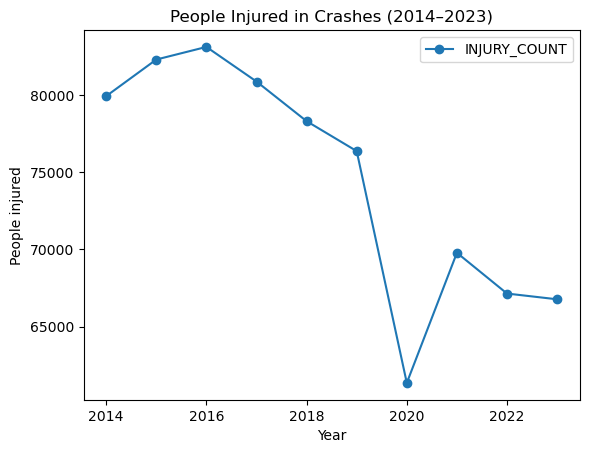

In [176]:
base_dir = r"C:/Users/maidn/OneDrive - Dickinson College/Dickinson/senior/DATA 400/mini project data"
years = range(2014, 2024)

rows = []
for y in years:
    fp = fr"{base_dir}/Statewide_{y}/CRASH_{y}.csv"
    dfy = pd.read_csv(fp, usecols=['INJURY_COUNT'], low_memory=False)
    inj = pd.to_numeric(dfy['INJURY_COUNT'], errors='coerce').fillna(0).sum()
    rows.append({'Year': y, 'INJURY_COUNT': inj})

yearly = pd.DataFrame(rows)

print(yearly)  # sanity check

ax = yearly.plot(x='Year', y='INJURY_COUNT', kind='line', marker='o', legend=True)
ax.set_xlabel('Year')
ax.set_ylabel('People injured')
ax.set_title(f'People Injured in Crashes ({years.start}–{years.stop-1})')
plt.show()

### c, Number of People Killed in Crashes from 2014 to 2024

   Year  FATAL_COUNT
0  2014         1195
1  2015         1200
2  2016         1188
3  2017         1137
4  2018         1190
5  2019         1059
6  2020         1129
7  2021         1230
8  2022         1179
9  2023         1209


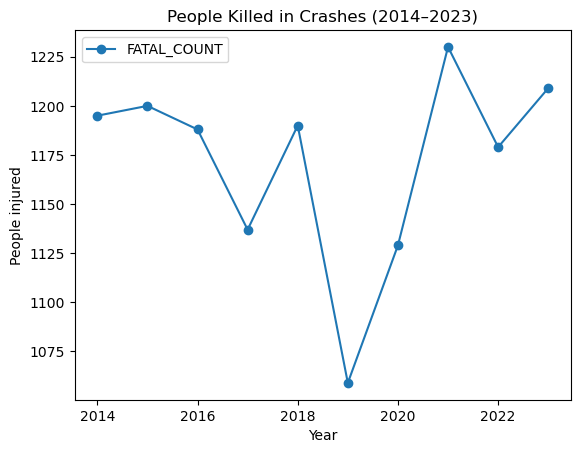

In [175]:
base_dir = r"C:/Users/maidn/OneDrive - Dickinson College/Dickinson/senior/DATA 400/mini project data"
years = range(2014, 2024)

rows = []
for y in years:
    fp = fr"{base_dir}/Statewide_{y}/CRASH_{y}.csv"
    dfy = pd.read_csv(fp, usecols=['FATAL_COUNT'], low_memory=False)
    inj = pd.to_numeric(dfy['FATAL_COUNT'], errors='coerce').fillna(0).sum()
    rows.append({'Year': y, 'FATAL_COUNT': inj})

yearly = pd.DataFrame(rows)

print(yearly)  # sanity check

ax = yearly.plot(x='Year', y='FATAL_COUNT', kind='line', marker='o', legend=True)
ax.set_xlabel('Year')
ax.set_ylabel('People injured')
ax.set_title(f'People Killed in Crashes ({years.start}–{years.stop-1})')
plt.show()

### c. Number of People Killed in Crashes from 2014 to 2024

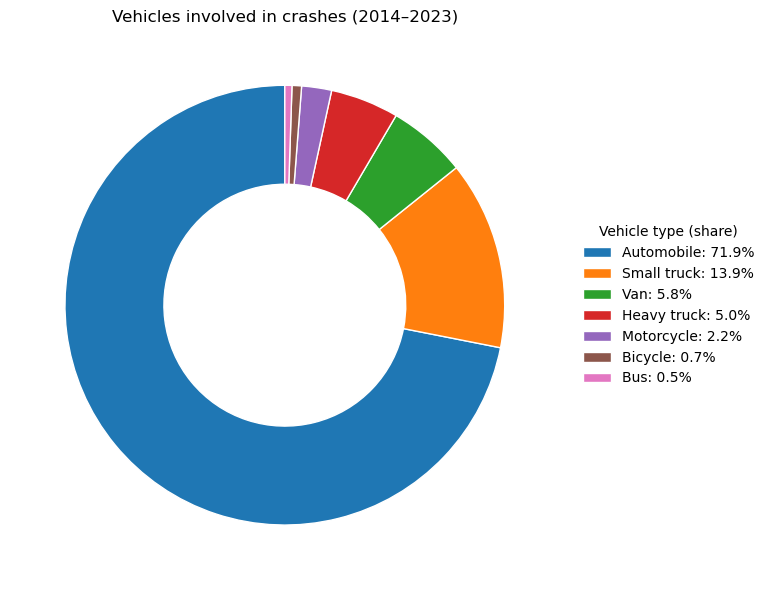

In [170]:
veh_map = {
    'AUTOMOBILE_COUNT':  'Automobile',
    'SMALL_TRUCK_COUNT': 'Small truck',
    'HEAVY_TRUCK_COUNT': 'Heavy truck',
    'BUS_COUNT':         'Bus',
    'VAN_COUNT':         'Van',
    'MOTORCYCLE_COUNT':  'Motorcycle',
    'BICYCLE_COUNT':     'Bicycle',
}

# totals per vehicle type (only columns that exist)
totals = pd.Series({lbl: df_copy[col].sum()
                    for col, lbl in veh_map.items()
                    if col in df_copy.columns}).sort_values(ascending=False)

title = (f"Vehicles involved in crashes ({int(df_copy['Year'].min())}–{int(df_copy['Year'].max())})"
         if 'Year' in df_copy.columns else "Vehicles involved in crashes")

fig, ax = plt.subplots(figsize=(8, 6))
wedges, _ = ax.pie(
    totals.values,
    startangle=90,
    wedgeprops={'width': 0.45, 'edgecolor': 'white'}  # donut style
)
ax.set(aspect='equal', title=title)

# legend with percentages
labels = [f"{k}: {v/totals.sum():.1%}" for k, v in totals.items()]
ax.legend(wedges, labels, title="Vehicle type (share)",
          loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

plt.tight_layout()
plt.show()